### Домашнее задание № 3

Используя сверточные слои и архитектуру получите на fashion mnist качество не ниже 89,5%

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

In [15]:
train_dataset = torchvision.datasets.FashionMNIST(
      root='./data/FashionMNIST'
        ,train=True
        ,download=True
        ,transform=transforms.Compose([
            transforms.ToTensor()
        ])                                            
  )

test_dataset = torchvision.datasets.FashionMNIST(
      root='./data/FashionMNIST'
        ,train=False
        ,download=True
        ,transform=transforms.Compose([
            transforms.ToTensor()
        ])                                            
  )

In [16]:
BATCH_SIZE=256

In [17]:
train_iter = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle = True)
test_iter = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False)

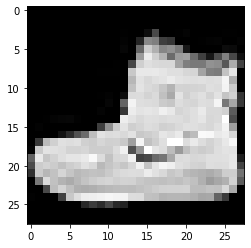

In [18]:
plt.imshow(train_set[0][0].numpy().reshape(28,28), cmap='gray')

## Модель

In [79]:
model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=5, padding=2),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    
    nn.Conv2d(32, 64, kernel_size=3),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    
    nn.Flatten(),
    nn.Linear(64*6*6, 600),
    nn.Dropout2d(0.25),
    nn.Linear(600, 120),
    nn.Linear(120, 10)
)

In [80]:
X = train_dataset[0][0]
X = X.reshape(1, 1, 28, 28)
print(X.shape)
for l in model:
    X = l(X)
    print("Layer {}. X shape: {}".format(l, X.shape))

torch.Size([1, 1, 28, 28])
Layer Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)). X shape: torch.Size([1, 32, 28, 28])
Layer BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True). X shape: torch.Size([1, 32, 28, 28])
Layer ReLU(). X shape: torch.Size([1, 32, 28, 28])
Layer MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 32, 14, 14])
Layer Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1)). X shape: torch.Size([1, 64, 12, 12])
Layer BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True). X shape: torch.Size([1, 64, 12, 12])
Layer ReLU(). X shape: torch.Size([1, 64, 12, 12])
Layer MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 64, 6, 6])
Layer Flatten(). X shape: torch.Size([1, 2304])
Layer Linear(in_features=2304, out_features=600, bias=True). X shape: torch.Size([1, 600])
Layer Dropout2d(p=0.25, inplace=False). X sha

In [81]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = torch.Tensor([0]), 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [82]:
def train(net, train_iter, test_iter, trainer, num_epochs):
    loss = nn.CrossEntropyLoss(reduction='sum')
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
        for X, y in train_iter:
            trainer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, '
              'time %.1f sec'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc,
                 time.time() - start))

In [83]:
lr, num_epochs = 0.001, 10
trainer = torch.optim.Adam(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs)

epoch 1, loss 0.4771, train acc 0.830, test acc 0.856, time 64.1 sec
epoch 2, loss 0.3071, train acc 0.891, test acc 0.874, time 62.9 sec
epoch 3, loss 0.2665, train acc 0.905, test acc 0.873, time 59.9 sec
epoch 4, loss 0.2440, train acc 0.912, test acc 0.896, time 60.0 sec
epoch 5, loss 0.2321, train acc 0.916, test acc 0.895, time 60.2 sec
epoch 6, loss 0.2114, train acc 0.923, test acc 0.889, time 60.2 sec
epoch 7, loss 0.2004, train acc 0.927, test acc 0.902, time 60.0 sec
epoch 8, loss 0.1896, train acc 0.930, test acc 0.909, time 60.2 sec
epoch 9, loss 0.1754, train acc 0.935, test acc 0.896, time 59.9 sec
epoch 10, loss 0.1672, train acc 0.938, test acc 0.908, time 60.1 sec
